In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import json
import os

pd.set_option("display.max_columns",0)

df = pd.read_json(os.path.join("..","..","data","TA_User_Reviws_Korea_all.json"))
df.head()

,id,language,reviewStatus,title,helpfulVotes,createdDate,publishedDate,rating,text,photoIds,photos,userId,__typename,location.locationId,location.name,location.additionalNames.long,location.additionalNames.longOnlyParent,location.additionalNames.__typename,location.placeType,location.isGeo,location.parentGeoId,location.reviewSummary.count,location.reviewSummary.rating,location.reviewSummary.locationId,location.reviewSummary.__typename,location.thumbnail.id,location.thumbnail.photoSizes,location.thumbnail.__typename,location.parent.locationId,location.parent.parentGeoId,location.parent.name,location.parent.additionalNames.long,location.parent.additionalNames.__typename,location.parent.__typename,location.route.url,location.route.__typename,location.socialStatistics.isSaved,location.socialStatistics.__typename,location.__typename,userProfile.userId,userProfile.isMe,userProfile.isVerified,userProfile.displayName,userProfile.username,userProfile.contributionCounts.sumAllUgc,userProfile.contributionCounts.__typename,userProfile.avatar.id,userProfile.avatar.photoSizes,userProfile.avatar.__typename,userProfile.hometown.locationId,userProfile.hometown.fallbackString,userProfile.hometown.location,userProfile.hometown.__typename,userProfile.expertForums.generalForumIds,userProfile.expertForums.geoForumLocationIds,userProfile.expertForums.__typename,userProfile.route.url,userProfile.route.__typename,userProfile.__typename,userProfile.isFollowing,userProfile.followerCount,socialStatistics.followCount,socialStatistics.isFollowing,socialStatistics.isLiked,socialStatistics.isBoosted,socialStatistics.boostCount,socialStatistics.likeCount,socialStatistics.isReposted,socialStatistics.repostCount,socialStatistics.isSaved,socialStatistics.tripCount,socialStatistics.__typename,route.url,route.__typename,tripInfo.stayDate,tripInfo.__typename,userProfile.hometown.location.locationId,userProfile.hometown.location.name,userProfile.hometown.location.additionalNames.long,userProfile.hometown.location.additionalNames.__typename,userProfile.hometown.location.parent.locationId,userProfile.hometown.location.parent.name,userProfile.hometown.location.parent.__typename,userProfile.hometown.location.__typename,tripInfo,location.thumbnail,route,location.route,userProfile.route,location.reviewSummary,location.parent,userProfile.hometown.location.parent,userProfile.contributionCounts,location,userProfile.avatar
0,748454819,en,PUBLISHED,Great Hotel,0,2020-03-01,2020-03-01,5,I really enjoyed our stay here in Gracery Hote...,[453807126],"[{'id': 453807126, 'title': None, 'description...",F9AD0C1F6409A1574AD0AFC237D2A4CE,Review,14159911,Hotel Gracery Seoul,"Hotel Gracery Seoul, South Korea",South Korea,AdditionalNames,ACCOMMODATION,False,294197,86.0,4.0,14159911.0,LocationReviewSummary,361115988.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,294197,294196,Seoul,"Seoul, South Korea",AdditionalNames,LocationInformation,/Hotel_Review-g294197-d14159911-Reviews-Hotel_...,LocationDetailRoute,False,SocialStatistics,LocationInformation,F9AD0C1F6409A1574AD0AFC237D2A4CE,False,False,nataliea328,nataliea328,7,ContributionCounts,452388042.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,NaN,None,NaN,MemberLocation,[],[],ExpertForums,/Profile/nataliea328,MemberProfileRoute,MemberProfile,0.0,0.0,0,False,False,False,0,0,False,0,False,0,SocialStatistics,/ShowUserReviews-g294197-d14159911-r748454819-...,ShowUserReviewRoute,2020-02-29,TripInfo,NaN,None,None,None,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,744980685,en,PUBLISHED,Vibrant and Trendy,0,2020-02-14,2020-02-13,5,This is a place for you to laidback and have s...,[],[],23EF5413495FF530151DB7E5C0FEF38D,Review,1958940,Hongik University Street,"Hongik University Street, South Korea",South Korea,AdditionalNames,ATTRACTION,False,294197,2256.0,4.5,1958940.0,LocationReviewSummary,38633900.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,294197,294196,Seoul,"Seoul, South Korea",Additiona

In [78]:
import requests
import time

GRAPHQL_BATCHED_URL = "https://www.tripadvisor.com/data/graphql/batched"

def get_review_response(limit_num = 100, location_id = 14159911, offset = 100):
    payload = "[{\"query\":\"query ReviewListQuery($locationId: Int!, $offset: Int, $limit: Int, $filters: [FilterConditionInput!], $prefs: ReviewListPrefsInput, $initialPrefs: ReviewListPrefsInput, $filterCacheKey: String, $prefsCacheKey: String, $keywordVariant: String!, $needKeywords: Boolean = true) {\\n  cachedFilters: personalCache(key: $filterCacheKey)\\n  cachedPrefs: personalCache(key: $prefsCacheKey)\\n  locations(locationIds: [$locationId]) {\\n    locationId\\n    parentGeoId\\n    name\\n    placeType\\n    reviewSummary {\\n      rating\\n      count\\n    }\\n    keywords(variant: $keywordVariant) @include(if: $needKeywords) {\\n      keywords {\\n        keyword\\n      }\\n    }\\n    ... on LocationInformation {\\n      parentGeoId\\n    }\\n    ... on LocationInformation {\\n      parentGeoId\\n    }\\n    ... on LocationInformation {\\n      name\\n      currentUserOwnerStatus {\\n        isValid\\n      }\\n    }\\n    ... on LocationInformation {\\n      locationId\\n      currentUserOwnerStatus {\\n        isValid\\n      }\\n    }\\n    ... on LocationInformation {\\n      locationId\\n      parentGeoId\\n      accommodationCategory\\n      currentUserOwnerStatus {\\n        isValid\\n      }\\n      url\\n    }\\n    reviewListPage(page: {offset: $offset, limit: $limit}, filters: $filters, prefs: $prefs, initialPrefs: $initialPrefs, filterCacheKey: $filterCacheKey, prefsCacheKey: $prefsCacheKey) {\\n      totalCount\\n      preferredReviewIds\\n      reviews {\\n        ... on Review {\\n          id\\n          url\\n          location {\\n            locationId\\n            name\\n          }\\n          createdDate\\n          publishedDate\\n          provider {\\n            isLocalProvider\\n          }\\n          userProfile {\\n            id\\n            userId: id\\n            isMe\\n            isVerified\\n            displayName\\n            username\\n            avatar {\\n              id\\n              photoSizes {\\n                url\\n                width\\n                height\\n              }\\n            }\\n            hometown {\\n              locationId\\n              fallbackString\\n              location {\\n                locationId\\n                additionalNames {\\n                  long\\n                }\\n                name\\n              }\\n            }\\n            contributionCounts {\\n              sumAllUgc\\n              helpfulVote\\n            }\\n            route {\\n              url\\n            }\\n          }\\n        }\\n        ... on Review {\\n          title\\n          language\\n          url\\n        }\\n        ... on Review {\\n          language\\n          translationType\\n        }\\n        ... on Review {\\n          roomTip\\n        }\\n        ... on Review {\\n          tripInfo {\\n            stayDate\\n          }\\n          location {\\n            placeType\\n          }\\n        }\\n        ... on Review {\\n          additionalRatings {\\n            rating\\n            ratingLabel\\n          }\\n        }\\n        ... on Review {\\n          tripInfo {\\n            tripType\\n          }\\n        }\\n        ... on Review {\\n          language\\n          translationType\\n          mgmtResponse {\\n            id\\n            language\\n            translationType\\n          }\\n        }\\n        ... on Review {\\n          text\\n          publishedDate\\n          username\\n          connectionToSubject\\n          language\\n          mgmtResponse {\\n            id\\n            text\\n            language\\n            publishedDate\\n            username\\n            connectionToSubject\\n          }\\n        }\\n        ... on Review {\\n          id\\n          locationId\\n          title\\n          text\\n          rating\\n          absoluteUrl\\n          mcid\\n          translationType\\n          mtProviderId\\n          photos {\\n            id\\n            statuses\\n            photoSizes {\\n              url\\n              width\\n              height\\n            }\\n          }\\n          userProfile {\\n            id\\n            displayName\\n            username\\n          }\\n        }\\n        ... on Review {\\n          mgmtResponse {\\n            id\\n          }\\n          provider {\\n            isLocalProvider\\n          }\\n        }\\n        ... on Review {\\n          translationType\\n          location {\\n            locationId\\n            parentGeoId\\n          }\\n          provider {\\n            isLocalProvider\\n            isToolsProvider\\n          }\\n          original {\\n            id\\n            url\\n            locationId\\n            userId\\n            language\\n            submissionDomain\\n          }\\n        }\\n        ... on Review {\\n          locationId\\n          mcid\\n          attribution\\n        }\\n        ... on Review {\\n          __typename\\n          locationId\\n          helpfulVotes\\n          photoIds\\n          route {\\n            url\\n          }\\n          socialStatistics {\\n            followCount\\n            isFollowing\\n            isLiked\\n            isReposted\\n            isSaved\\n            likeCount\\n            repostCount\\n            tripCount\\n          }\\n          status\\n          userId\\n          userProfile {\\n            id\\n            displayName\\n            isFollowing\\n          }\\n          location {\\n            __typename\\n            locationId\\n            additionalNames {\\n              normal\\n              long\\n              longOnlyParent\\n              longParentAbbreviated\\n              longOnlyParentAbbreviated\\n              longParentStateAbbreviated\\n              longOnlyParentStateAbbreviated\\n              geo\\n              abbreviated\\n              abbreviatedRaw\\n              abbreviatedStateTerritory\\n              abbreviatedStateTerritoryRaw\\n            }\\n            parent {\\n              locationId\\n              additionalNames {\\n                normal\\n                long\\n                longOnlyParent\\n                longParentAbbreviated\\n                longOnlyParentAbbreviated\\n                longParentStateAbbreviated\\n                longOnlyParentStateAbbreviated\\n                geo\\n                abbreviated\\n                abbreviatedRaw\\n                abbreviatedStateTerritory\\n                abbreviatedStateTerritoryRaw\\n              }\\n            }\\n          }\\n        }\\n        ... on Review {\\n          text\\n          language\\n        }\\n        ... on Review {\\n          locationId\\n          absoluteUrl\\n          mcid\\n          translationType\\n          mtProviderId\\n          originalLanguage\\n          rating\\n        }\\n        ... on Review {\\n          id\\n          locationId\\n          title\\n          labels\\n          rating\\n          absoluteUrl\\n          mcid\\n          translationType\\n          mtProviderId\\n          alertStatus\\n        }\\n      }\\n    }\\n    reviewAggregations {\\n      ratingCounts\\n      languageCounts\\n      alertStatusCount\\n    }\\n  }\\n}\\n\",\"variables\":{\"locationId\":"+str(location_id)+",\"offset\":"+str(offset)+",\"filters\":[],\"prefs\":null,\"initialPrefs\":{},\"limit\":100,\"filterCacheKey\":null,\"prefsCacheKey\":\"locationReviewPrefs\",\"needKeywords\":false,\"keywordVariant\":\"location_keywords_v2_llr_order_30_en\"}}]"
    headers = {
      'Host': 'www.tripadvisor.com',
      'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:76.0) Gecko/20100101 Firefox/76.0',
      'Accept': '*/*',
      'Accept-Language': 'en-US,en;q=0.5',
      'Accept-Encoding': 'gzip, deflate, br',
      'Content-Type': 'application/json',
      'Content-Length': str(len(payload)),
      'x-requested-by': 'TNI1625!AFBLriG9E9mRxHaBi32eBjKQ7a2LmfGAX+CVX2ohhCfmwzkaBi5IKROaZIk37QxcuQ1nkDBiBFJ8O0+QY9mSlFPJtOTv9drlx7Zhb8u/oaFKd+l2XQ4nWuhOi0LVR783Nj/vu5EnQHonT9aWaHIH0fhlqQpSI5m1jc4941UJKEal',
      'Origin': 'https://www.tripadvisor.com',
      'Referer': 'https://www.tripadvisor.com/Hotel_Review-g294197-d8522945-Reviews-or5-Lotte_City_Hotel_Myeongdong-Seoul.html',
      'Connection': 'keep-alive',
      'TE': 'Trailers',
      'Content-Type': 'application/json',
      'Cookie': 'TADCID=xb4pR5DEee-c1F5zABQCjnFE8vTET66GHuEzPi7KfV2dQtLPg4iCvJ_Z66_QKHsAgATqc99Prgq_r5ckaJKuAmvI4B6vXTGf8vE; TAUnique=%1%enc%3AiyVYLMthAw6AwVmIfRXwAx40%2FJkRrjfstBSt4XtnG3Q%3D; TART=%1%enc%3AgMFZiH0V8APR6tPUWRYf72MQLWwsHS2iRSguGQHboQqLZt8SsbUeZ%2B%2BfEVhiGUCJNox8JbUSTxk%3D; TASSK=enc%3AAPL%2B0M4UrH8xAwwBFqSwk3Xm8%2Bm%2FO3pBnORXw9BvAFm%2F0MCL0uteq3wZtROpoqKnu5fn2ILk5pKoAVN1WNHdfphH1n0zjzDGPV8ZFg95%2FRlsPH9JC2u9oYpnJ3PR1vMnUg%3D%3D; TASession=V2ID.4F557FE1C5DED4F2557BC8DD4FA0DE62*SQ.1*GR.83*TCPAR.55*TBR.57*EXEX.6*ABTR.98*PHTB.49*FS.96*CPU.82*HS.recommended*ES.popularity*DS.5*SAS.popularity*FPS.oldFirst*LF.en*FA.1*DF.0*TRA.false*LD.8522945*EAU._; PAC=AFm7_ckuqvtaOvzKNbuAM8FwGxDPVzdxC8Xew3hsQt98LdMoHg9TZJSeZGCBFKzRUZq9L8SP2TyUsfiRbzjmyXuUaP1DqB7Zcvmo492Zj-RuQbxGUnhqKd16xLZ-YAJxHoL2reHBk380LJ85KqnrT76aglrk8sjCIYAUaOIzYGUoebfxgrO1wY2jkOPpOpmsCG31UaAuj4A9e004edK39Fg%3D; ServerPool=A; PMC=V2*MS.93*MD.20200522*LD.20200522; TATravelInfo=V2*AY.2020*AM.7*AD.29*DY.2020*DM.7*DD.30*A.2*MG.-1*HP.2*FL.3*DSM.1590124328886*RS.1; TAUD=LG-1590124328572-2.1.F.*RDD-2-2020_05_22*HDD-3-2020_07_29.2020_07_30.1; TAReturnTo=%1%%2FHotel_Review-g294197-d8522945-Reviews-or5-Lotte_City_Hotel_Myeongdong-Seoul.html; ak_bmsc=D13CE8C991BA5CCA49963A76A1074B03173B488C5B4E00007C72C75E75ACA22C~plZwPH03cd1FQUh0P1Kzpye/K53TxerLxayVza6TNaxZdW9YaCMbln1cx7uoOeZ4kc0HnTkOJ8Oa1+7IWEdobHCDHrDipZZx8aPCqSSp91LHTN4aYDxjw6imy3RAJEj3G/peBm/FHVJvdpj1zHeu8AlWGvNOmgWkZz36cdhHpg0xtN6n0RaTs/SwO5Vr0ZCivczGEqNE1cg+GQnq4C9fSjE1kvtQJnDD9OGZ/N35sg004=; __vt=VnYX5Mfd2RVaCvPRABQCq4R_VSrMTACwWFvfTfL3vw17zUWC2TNQxSWvkoQNOl_9AkPcPxGyo4TYnzGR9ljCE_z_kCW-04K3iGGhUDQ5UotkYH1aw3ehlkXb5Efm4WYLFpvYeDUl22ADbb_IHjYNgF7kag'
    }
    
    error_count = 0
    
    while True:
        try:
            response = requests.request("POST", GRAPHQL_BATCHED_URL, headers=headers, data = payload)
            result = response.json()
            return result
        except:
            time.sleep(3)
            error_count += 1
            if error_count > 3:
                print("Error!! in Request", location_id, end=" ")
                return False
            continue

In [4]:
get_reviews_arr = lambda x: x[0]['data']['locations'][0]['reviewListPage']['reviews']

In [5]:
s = get_review_response(limit_num = 20, location_id = 1196214, offset = 0)

In [6]:
a = get_reviews_arr(s)

In [7]:
len(a)

20

In [9]:
df_eat = df[(df['location.parent.additionalNames.long'] == "Seoul, South Korea") & (df['location.placeType'] == "EATERY")]
eatery_ids = df_eat['location.locationId'].unique()

In [10]:
# result_json.json()

In [11]:
result_arr = []

In [12]:
len(eatery_ids)

5578

In [73]:
result_arr = []

In [74]:
import gc

In [76]:
# gc.collect()

In [17]:
i

3200

In [79]:
limit_num = 20
for i, did in enumerate(eatery_ids[3201:]):
    try:
        offset_num = 0
        count = 1
        first_flag = True

        while count:
            result_json = get_review_response(limit_num = limit_num, location_id = did, offset = offset_num)
            if not result_json:
                print("Error!", i, did)
                continue
            reviews_arr = get_reviews_arr(result_json)
    #         print("Success",i,did, len(reviews_arr), result_json[0]['data']['locations'][0]['reviewSummary']['count'], count)
            result_arr.extend(reviews_arr)

            if first_flag:
                count += max((result_json[0]['data']['locations'][0]['reviewSummary']['count'] - limit_num),0) // limit_num
                first_flag = False

            offset_num += limit_num
            count -= 1
        print(i, did, len(result_arr))
    except:
        print("Error!!!", i, did)
        continue

788542 20
4077917 100
9732387 108
9379120 109
13833720 117
8904596 118
8904578 119
8977925 122
7748374 134
9997022 154
9437416 157
9250108 175
3232783 184
9322611 187
9430902 192
4050193 203
9376850 204
8780545 216
7748199 236
10902927 240
4032884 243
9354995 244
5483610 264
7974076 304
4070952 444
8737576 455
7899611 475
9751888 495
9458191 499
3938982 511
7899589 611
9227593 671
1144388 689
5979659 709
10192704 769
4071102 780
7618191 900
11950049 960
13847461 1040
12222340 1060
9228042 1070
9003609 1086
4071162 1088
3934085 1128
4050393 1168
9715895 1180
7748065 1190
8472275 1350
4080427 1351
8734362 1371
8368701 1376
9128147 1379
9227799 1399
8877518 1404
4030593 1417
6941978 1457
8912667 1458
11621260 1464
9439314 1465
9143441 1468
9252481 1469
9133639 1470
9123597 1477
8940512 1478
4072887 1479
9443262 1481
4075120 1496
9077437 1498
8919071 1518
9996913 1524
4081808 1544
8428577 1644
9008464 1662
5976836 1702
4030192 1703
2228895 1721
10501196 1761
14998705 1776
10342318 1784
405

In [80]:
len(result_arr)

20999

In [81]:
df_reviews = pd.json_normalize(result_arr)

In [82]:
df_reviews.head(5)

,id,url,createdDate,publishedDate,title,language,translationType,roomTip,additionalRatings,mgmtResponse,text,username,connectionToSubject,locationId,rating,absoluteUrl,mcid,mtProviderId,photos,original,attribution,__typename,helpfulVotes,photoIds,status,userId,originalLanguage,labels,alertStatus,location.locationId,location.name,location.placeType,location.parentGeoId,location.__typename,location.additionalNames.normal,location.additionalNames.long,location.additionalNames.longOnlyParent,location.additionalNames.longParentAbbreviated,location.additionalNames.longOnlyParentAbbreviated,location.additionalNames.longParentStateAbbreviated,location.additionalNames.longOnlyParentStateAbbreviated,location.additionalNames.geo,location.additionalNames.abbreviated,location.additionalNames.abbreviatedRaw,location.additionalNames.abbreviatedStateTerritory,location.additionalNames.abbreviatedStateTerritoryRaw,location.parent.locationId,location.parent.additionalNames.normal,location.parent.additionalNames.long,location.parent.additionalNames.longOnlyParent,location.parent.additionalNames.longParentAbbreviated,location.parent.additionalNames.longOnlyParentAbbreviated,location.parent.additionalNames.longParentStateAbbreviated,location.parent.additionalNames.longOnlyParentStateAbbreviated,location.parent.additionalNames.geo,location.parent.additionalNames.abbreviated,location.parent.additionalNames.abbreviatedRaw,location.parent.additionalNames.abbreviatedStateTerritory,location.parent.additionalNames.abbreviatedStateTerritoryRaw,provider.isLocalProvider,provider.isToolsProvider,userProfile.id,userProfile.userId,userProfile.isMe,userProfile.isVerified,userProfile.displayName,userProfile.username,userProfile.avatar.id,userProfile.avatar.photoSizes,userProfile.hometown.locationId,userProfile.hometown.fallbackString,userProfile.hometown.location.locationId,userProfile.hometown.location.additionalNames.long,userProfile.hometown.location.name,userProfile.contributionCounts.sumAllUgc,userProfile.contributionCounts.helpfulVote,userProfile.route.url,userProfile.isFollowing,tripInfo.stayDate,tripInfo.tripType,route.url,socialStatistics.followCount,socialStatistics.isFollowing,socialStatistics.isLiked,socialStatistics.isReposted,socialStatistics.isSaved,socialStatistics.likeCount,socialStatistics.repostCount,socialStatistics.tripCount,userProfile.hometown.location,mgmtResponse.id,mgmtResponse.language,mgmtResponse.translationType,mgmtResponse.text,mgmtResponse.publishedDate,mgmtResponse.username,mgmtResponse.connectionToSubject,userProfile,tripInfo,userProfile.route
0,566403778,/ShowUserReviews-g294197-d788542-r566403778-Ma...,2018-03-14,2018-03-13,야경이 이쁜곳,ko,None,None,[],NaN,기념일 식사로 좋습니다. 음식도 무난한데 전망이 멋있어서 분위기 있게 와인 마시는걸...,springspring404,None,788542,5,https://www.tripadvisor.com/ShowUserReviews-g2...,14469,0,[],None,None,Review,0,[],PUBLISHED,7386DBCA506A3BEFD1691E858ACACFD6,ko,[],False,788542,Marco Polo,EATERY,294197,LocationInformation,Marco Polo,"Marco Polo, South Korea",South Korea,"Marco Polo, South Korea",South Korea,"Marco Polo, South Korea",South Korea,Seoul,Marco Polo,Marco Polo,Marco Polo,Marco Polo,294197,Seoul,"Seoul, South Korea",South Korea,"Seoul, South Korea",South Korea,"Seoul, South Korea",South Korea,Seoul,Seoul,Seoul,Seoul,Seoul,True,True,7386DBCA506A3BEFD1691E858ACACFD6,7386DBCA506A3BEFD1691E858ACACFD6,False,False,springspring404,springspring404,452389699.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,294197.0,294197,294197.0,"Seoul, South Korea",Seoul,108.0,15.0,/Profile/springspring404,False,2018-03-31,FRIENDS,/ShowUserReviews-g294197-d788542-r566403778-Ma...,0,False,False,False,False,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,545673090,/ShowUserReviews-g294197-d788542-r545673090-Ma...,2017-12-07,2017-12-06,뷰가 좋아요,ko,None,None,"[{'rating': 3, 'ratingLabel': 'Value'}, {'rati...",NaN,"기념일에 갔었는데, 전망과 음식 모두 괜찮았습니다. 좌석이 창가쪽을 향하게 배치되어...",ruze0201,None,788542,4,https://www.tripadvisor.com/ShowUserReviews-g2...,14469,0,

In [83]:
df_reviews = df_reviews[df_reviews['userProfile.userId'] == df_reviews['userProfile.userId']].reset_index(drop=True)

In [84]:
df_reviews.shape[0], df.shape[0]

(20928, 63520)

In [85]:
df = pd.concat([df_reviews, df])

In [86]:
df = df.reset_index(drop=True).drop_duplicates(subset=['id']).reset_index(drop=True)

In [87]:
df.shape

(81645, 100)

In [88]:
df = df.dropna(axis=1)

In [89]:
df['location.locationId'].nunique()

5578

In [90]:
df.pivot_table('rating', 'location.locationId', "userId")

userId,0002C7C9BF0686DB770487FD63B5C6F5,000347839C2E555CE5DDEA19BE2F0572,000725E78BF4F3E502F6A9C6825A2FA3,000778D2BB5FDE72ED7C28D6D3E11492,000AF1C472049F795DA40559DC8BA135,000EFE8EF3AAA8F65E03C2DAB9B5CE90,0012BD7BF8CF7509C16557453E369F97,001334E6F06CFF3CBB83C7E1F74E2B09,00138C47862919BE12B4E424B16FC24E,00150C8ACD87B7A3A54497D923CB3358,0016A02304D7431CC80DFD3B7B4B5492,0017970D4A6E33FB6E6D2DEB21BE68B7,0017BE9D9765C53BA068B23B5244A7B0,001A7245FAAB8EA12D7326F5F4E39BCA,001A956E08972247571F01AA5327930E,001BB8AC0C5522749B25012F8645FAE7,001CD96719D272606C0078D7C5DDBFC2,001E8BDB86C330C9B6E412EE5D30BE37,002578DAF48AA098B0FAA9944F12D2F8,002660C3C4BC9DF1527402FBEBC8225A,00266569FEDD641373F7EDE3C58AF9E3,002D0B50E8140824C5C1AABF9F08E693,002DF8BA5E45189BAD2F9F16C833DB2D,002EC0CFE1F17C6E4CDC70E752D7A7FB,002FD28949CA2FA59720F7B2AA076089,00301724F7F1452DAA0AEDAEA9B539B2,00311E9092F5E48B3A932DE8B6AE6BBE,00313B026B064F84D2DAEDBB99727489,00329EF093BDEB78AD8F74EEFC01344E,00331E5A3336BFF2EFB39611897EF8EA,0033794C939E5150A8DD6BABEAC7BB05,00347C47E53F9D5948377534FCA87191,0037FD8F1AE2A90225D01A0530553E3C,003808B0F292C2557A4C55AA2045B446,003BEF8797D24D9C7F2A2EEE5B9A1FAB,003F237964F31FB7FCC635E08E64C77C,00420B61EE95462A6C27997E1B20B198,0042B125EFBE37D506573F8A46BC7377,0042D2BFB2E1CA77CFDCE0765890212D,0043AC7C6957C6A33095A9119C804876,0045A6B3045A27EB406D9542FE1F1258,0048A04AF6F38DE9DE05C9600E10E37D,0049A9D5B3AD8B8D06C5A6C8050BED07,004B36F2E0E620BEA66680D89D1970F7,004BFAF0CD43E5580D453C3BD8C0A0F0,004BFCA653AC87759B3F6CCA045AAA59,0054330624F137A76D052C94F4BF039B,0055ED8F1765E81486FE634D03609218,0057FD300997F5D9170C72408EADEAD8,005904FBD11B103FAC3950E58B276881,005E491A916F4CB0B4E6FDF46A812B16,005E8356BCD67ACEFC7087858F3D9BA9,005F2850AF8EF5BB57628D3CF1D3BE0C,0060FA49D122AC463D1B47EB3DEC0ACE,...,FF8D05738E8B0A1EEDE3D73F54E937D6,FF8D645A1554B2B97D65637FEE234A99,FF8FB9959DABE216338CA2BF3D824346,FF90963B0B9267F35B412BF1D9624DA3,FF96BBC671318FE77F1662CCB9F7ACEE,FF998D0CF81CDA0EC006C36CBDEA2AB6,FF9C2F27BB4BD405375A2BFB146F69D3,FF9F404AFAD38F7982DC52DF1C4CFC9C,FFA0B1D165671507B1A589514F75ACF0,FFA1442B9EE82B612757D33E07FB0296,FFA1ED4675FF5FD87014F4F8EF55BE86,FFA2DE55B05049F9F61F42D5F3E7E753,FFA6A33167CE61EB6AB11E1D4651DD39,FFA97CD443C2CE0BC7BF71AF59748DE2,FFACEF9444D301376CD3275873471BD4,FFACF67C4532B6183BE1DD736939BEF7,FFB0E83C7824435F4995528415A81628,FFB58DABAD7FFF0E4972AC80BA4114D2,FFB61B1A83604683BDBFF68D444F304C,FFB74FA834FD153C2DEDFC462F22470A,FFBCF31C15822BE407A0F3772518246A,FFBD77A3D6405EC1A14234B5161F3A9C,FFC8755AEFCA07F381AE50DDC792F6BE,FFCC0535A331E71AEA8C932462F70EDF,FFCC4CD7D04CE90206E6F58EB5882F16,FFCCB2007AA72C3DC588781318E9D3FE,FFCFA67E6365DAB3842409291E2EA0DC,FFD0879F29DF2EE6D50D68EC0429FFBD,FFD251DBDF9BA2EAC06A4F36623D85EB,FFD557C3CEE0520314803157C250AFBB,FFDB54875143A39758611753F47DB98E,FFDCB89D7F4CCA8D3F0A6123E5A3B4A4,FFDD196F3C87F7BEAC9348177E0FC8D4,FFDDE3BC1D30D0F57EE14527BF287D4A,FFDF0DA4CDD716DCA7B4302A3C8B14F2,FFDF41AA8F91A6090478E6CE23D2208F,FFE041635D5BBA63814EADCF8EE4967B,FFE1968F0240B11144E237E156BC9A2E,FFE20FD32B98BF65604177874CA99F0C,FFE22E225A94675090B123CD987628FB,FFE2FF33C7F3DFC7BEE341909D18EA26,FFE4ABF483FCA91F5AF00EBDFEF9FB4C,FFE5D261C330B39D73682AF8BCC48F38,FFE8A83BD9BCB5DEA6ACFA717BCD03B1,FFEA01D7A70AC5F0457BC4048D87CAA0,FFEC2E70B29FDA68FE4E88B82843C01B,FFF03FF90DFD2F24EBE2A6E9C64FA865,FFF681ACE1AD5E06D1EB02D5B45CBFA5,FFF8945AA09533EEB38D4CC68C1EABAE,FFFA4CD3CA3DF30B114E421DC0FB58EB,FFFA4D451827404B23F3C1AF0905BD55,FFFB8DA80DB5D74BFB28A8C581007477,FFFBD5D5AB0E4CE360D46669493AD16B,FFFD9E1DA7FB22C470710474AE1F3873
location.locationId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
776544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

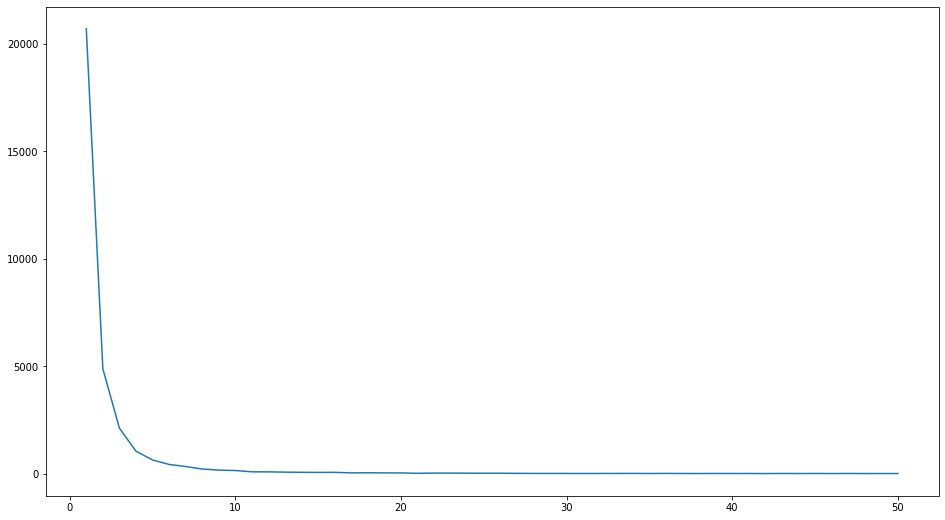

In [91]:
df["userId"].value_counts().reset_index()['userId'].value_counts().sort_index()[:50].plot(figsize=(16,9))

In [92]:
df["userId"].value_counts().reset_index()['userId'].value_counts().sort_index()[:50]

1     20686
2      4877
3      2114
4      1044
5       635
6       426
7       329
8       213
9       163
10      143
11       84
12       81
13       68
14       60
15       56
16       59
17       34
18       39
19       33
20       32
21       14
22       24
23       23
24       20
25       17
26       17
27       12
28        8
29        8
30        8
31        5
32        8
33        7
34        9
35        5
36        9
37        5
38        4
39        7
40        5
41        6
42        2
43        7
44        3
45        7
46        3
47        7
48        3
49        4
50        4
Name: userId, dtype: int64

In [95]:
data_path = os.path.join("..", "..", "data", "TA_Seoul_Eatery_Reviews.json")

In [96]:
df.to_json(data_path, orient="records")

In [99]:
df['location.locationId'].value_counts()

1196214     3350
1174982     2647
1978666     1214
1777631     1131
2476809      840
            ... 
9439314        1
4075831        1
19101820       1
9031849        1
4075526        1
Name: location.locationId, Length: 5578, dtype: int64